# Capstone Project

## Introduction

#### For this project, I will be finding a prime location for opening a new restaurant in Toronto, Canada. Toronto is a well-traveled city due to the numerous amounts of museums, sports events and other tourist attractions. Toronto is also quite diverse so, any kind of cuisine has potential to become a staple within the city. There are many reasons for someone to consider opening a restaurant in this area, but, finding a successful location may be difficult.

#### This is where data science comes in. After analyzing all data conducted from this project, I will be able to suggest neighborhoods that will be desirable for future restaurateurs.

## Data

#### According to our problem, the data that will need to use includes;
#### 1.) the amount of restaurants in the city
#### 2.) the popularity of restaurants in a certain location in Toronto
#### 3.) the proximity of each restaurant to Toronto's center
#### 4.) the borough's and neighborhoods in Toronto

#### The data for this project will be extracted from;
#### 1.) FourSquare API


## To begin, we must get the information for all the borough's and neighborhoods in Toronto. This can be pulled from scraping Wikipedia page.This will allow us to visualize the data. 

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install selenium

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install bs4
from bs4 import BeautifulSoup

print('Libraries imported.')

     |████████████████████████████████| 122kB 20.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Libraries imported.


In [8]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html_data = requests.get(url).text

In [9]:
soup = BeautifulSoup(html_data,"html5lib")

In [12]:
table=soup.find('table')
table_contents=[]
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
toronto_df=pd.DataFrame(table_contents)
toronto_df['Borough']=toronto_df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [13]:
df.head()

PostalCode           Borough                      Neighborhood
0        M3A        North York                         Parkwoods
1        M4A        North York                  Victoria Village
2        M5A  Downtown Toronto         Regent Park, Harbourfront
3        M6A        North York  Lawrence Manor, Lawrence Heights
4        M7A      Queen's Park     Ontario Provincial Government

In [17]:
Latitude = []
Longitude = []
for neigh,bou,i in zip(toronto_df['Neighborhood'],toronto_df['Borough'],toronto_df.index):  
    address = "'"+neigh+ ","+ " "+ bou+"'"
    geolocator = Nominatim(user_agent="toronto_explorer")
    location = geolocator.geocode(address)
    if location != None:
        Latitude.append(location.latitude)
        Longitude.append(location.longitude)
        
    else:
        Latitude.append(0)
        Longitude.append(0)
        
print(Latitude)
print(Longitude)

[43.7587999, 43.732658, 0, 43.7163909, 0, 43.688307, 43.8091955, 43.775347, 43.7050419, 0, 43.7087117, 0, 0, 43.775347, 43.69992, 43.6694032, 43.6883215, 0, 43.7810872, 43.6710244, 0, 0, 43.7598243, 43.7047983, 43.6541737, 43.6632873, 43.75646655, 43.7996637, 0, 43.704553, 43.6516133, 43.6602019, 43.7437422, 0, 0, 43.6881713, 0, 0, 0, 43.7691966, 43.7492988, 43.6670441, 0, 0, 0, 43.7572882, 43.7492988, 0, 0, 0, 43.7600778, 43.7262522, 43.7895756, 43.7492988, 43.649210100000005, 43.7373876, 0, 0, 0, 43.7615095, 43.7492988, 43.729199, 43.70650675, 43.6684705, 43.7001608, 0, 43.7440391, 43.697936, 43.701028, 43.66421135, 43.6936399, 0, 43.7615095, 43.6465466, 0, 43.6389385, 0, 0, 43.7853531, 43.697936, 43.6632873, 43.6517776, 0, 0, 0, 0, 0, 0, 0, 0, 43.8029938, 43.6632873, 0, 43.6017173, 0, 43.809343, 0, 0, 0, 43.6622858, 0, 0, 0]
[-79.3201966, -79.3111892, 0, -79.4425663, 0, -79.542802, -79.2217008, -79.3459439, -79.3135303, 0, -79.4406853, 0, 0, -79.3459439, -79.319279, -79.3727041, -79

In [18]:
toronto_df['Latitude'] = Latitude
toronto_df['Longitude'] = Longitude
toronto_df= toronto_df[toronto_df.Latitude != 0].reset_index(drop = True)
toronto_df = toronto_df[toronto_df.Longitude != 0].reset_index(drop = True)
toronto_df

PostalCode                 Borough  \
0         M3A              North York   
1         M4A              North York   
2         M6A              North York   
3         M9A               Etobicoke   
4         M1B             Scarborough   
5         M3B              North York   
6         M4B               East York   
7         M6B              North York   
8         M3C              North York   
9         M4C               East York   
10        M5C        Downtown Toronto   
11        M6C                    York   
12        M1E             Scarborough   
13        M4E            East Toronto   
14        M1G             Scarborough   
15        M4G               East York   
16        M5G        Downtown Toronto   
17        M6G        Downtown Toronto   
18        M1H             Scarborough   
19        M2H              North York   
20        M4H               East York   
21        M5H        Downtown Toronto   
22        M6H            West Toronto   
23        M1J             Scarborough   
24        M4J  East York/East Toronto   
25        M2K              North York   
26        M3K              North York   
27        M4K            East Toronto   
28        M2L              North York   
29        M3L              North York   
30        M9L              North York   
31        M1M             Scarborough   
32        M2M              North York   
33        M3M              North York   
34        M4M            East Toronto   
35        M5M              North York   
36        M2N              North York   
37        M3N              North York   
38        M4N         Central Toronto   
39        M5N         Central Toronto   
40        M6N                    York   
41        M9N                    York   
42        M2P              North York   
43        M4P         Central Toronto   
44        M5P         Central Toronto   
45        M6P            West Toronto   
46        M9P               Etobicoke   
47        M2R              North York   
48        M4R         Central Toronto   
49        M6R            West Toronto   
50        M1S             Scarborough   
51        M4S         Central Toronto   
52        M5S        Downtown Toronto   
53        M6S            West Toronto   
54        M1W             Scarborough   
55        M4W        Downtown Toronto   
56        M8W               Etobicoke   
57        M1X             Scarborough   
58        M4Y        Downtown Toronto   

                                       Neighborhood   Latitude  Longitude  
0                                         Parkwoods  43.758800 -79.320197  
1                                  Victoria Village  43.732658 -79.311189  
2                  Lawrence Manor, Lawrence Heights  43.716391 -79.442566  
3                                  Islington Avenue  43.688307 -79.542802  
4                                    Malvern, Rouge  43.809196 -79.221701  
5                                   Don Mills North  43.775347 -79.345944  
6                   Parkview Hill, Woodbine Gardens  43.705042 -79.313530  
7                                         Glencairn  43.708712 -79.440685  
8                                   Don Mills South  43.775347 -79.345944  
9                                  Woodbine Heights  43.699920 -79.319279  
10                                   St. James Town  43.669403 -79.372704  
11                               Humewood-Cedarvale  43.688322 -79.428080  
12                Guildwood, Morningside, West Hill  43.781087 -79.205440  
13                                      The Beaches  43.671024 -79.296712  
14                                           Woburn  43.759824 -79.225291  
15                                          Leaside  43.704798 -79.368090  
16                               Central Bay Street  43.654174 -79.380812  
17                                         Christie  43.663287 -79.419014  
18                                        Cedarbrae  43.756467 -79.226692  
19                    

## We have established the latitude and longitude of the Toronto area's needed to move along in our project. Now, we must locate the longitude and latitude of the city of Toronto itself.

In [19]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
Tlatitude = location.latitude
Tlongitude = location.longitude
print('Latitude =', Tlatitude)
print('Longitude =',Tlongitude)

Latitude = 43.6534817
Longitude = -79.3839347


## Now that we have found the coordinates for Toronto, we can begin to build off this data. With Foursquare API, we will be able to locate restaurants in Toronto.

In [28]:
CLIENT_ID = '3ISZPUGCJAF11IDRQT0GO1MTMKAR5APYJQFF43C5IRYWBLZC' # your Foursquare ID
CLIENT_SECRET = 'QL1ARAVA2G344WNOCGFPGE3SENRVK1KZKY5GBZ13J1W0CE4W' # your Foursquare Secret
VERSION = '20190529'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 3ISZPUGCJAF11IDRQT0GO1MTMKAR5APYJQFF43C5IRYWBLZC
CLIENT_SECRET:QL1ARAVA2G344WNOCGFPGE3SENRVK1KZKY5GBZ13J1W0CE4W


In [29]:
search_query = 'restaurant'
radius = 50000
print(search_query + ' imported')

restaurant imported


In [38]:
url = 'https://api.foursquare.com/v2/venues/search?client_id=3ISZPUGCJAF11IDRQT0GO1MTMKAR5APYJQFF43C5IRYWBLZC&client_secret=QL1ARAVA2G344WNOCGFPGE3SENRVK1KZKY5GBZ13J1W0CE4W&ll=43.6534817,-79.3839347&v=20190529&query=restaurant&radius=50000&limit=30'.format(CLIENT_ID, CLIENT_SECRET, Tlatitude, Tlongitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3ISZPUGCJAF11IDRQT0GO1MTMKAR5APYJQFF43C5IRYWBLZC&client_secret=QL1ARAVA2G344WNOCGFPGE3SENRVK1KZKY5GBZ13J1W0CE4W&ll=43.6534817,-79.3839347&v=20190529&query=restaurant&radius=50000&limit=30'

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60d4d7dd2da8845d366c04de'},
 'response': {'venues': [{'id': '4ad4c05ff964a52048f720e3',
    'name': 'Hemispheres Restaurant & Bistro',
    'location': {'address': '110 Chestnut Street',
     'lat': 43.65488413420439,
     'lng': -79.38593077371578,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65488413420439,
       'lng': -79.38593077371578}],
     'distance': 224,
     'postalCode': 'M5G 1R3',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['110 Chestnut Street',
      'Toronto ON M5G 1R3',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d14e941735',
      'name': 'American Restaurant',
      'pluralName': 'American Restaurants',
      'shortName': 'American',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1624561629',
    'hasPerk': False},
   {'id': '

In [40]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id                                name  \
0  4ad4c05ff964a52048f720e3     Hemispheres Restaurant & Bistro   
1  4ada5d5bf964a520e92121e3      The Hot House Restaurant & Bar   
2  4b072e9df964a52009f922e3  Sky Dragon Chinese Restaurant 龍翔酒樓   
3  4ad4c05cf964a52006f620e3               Victoria's Restaurant   
4  4b266f05f964a520657b24e3      Goldstone Noodle Restaurant 金石   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d14e941735', 'name': 'A...  v-1624561629    False   
1  [{'id': '4bf58dd8d48988d14e941735', 'name': 'A...  v-1624561629    False   
2  [{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...  v-1624561629    False   
3  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...  v-1624561629    False   
4  [{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...  v-1624561629    False   

      location.address  location.lat  location.lng  \
0  110 Chestnut Street     43.654884    -79.385931   
1         35 Church St     43.648824    -79.373702   
2     280 Spadina Ave.     43.652783    -79.398174   
3  37 King Street East     43.649298    -79.376431   
4      266 Spadina Ave     43.652278    -79.398039   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 43.65488413420439...                224   
1  [{'label': 'display', 'lat': 43.64882370529773...                973   
2  [{'label': 'display', 'lat': 43.65278331265585...               1149   
3  [{'label': 'display', 'lat': 43.64929834396347...                763   
4  [{'label': 'display', 'lat': 43.6522783893466,...               1143   

  location.postalCode location.cc location.city location.state  \
0             M5G 1R3          CA       Toronto             ON   
1             M5E 1T3          CA       Toronto             ON   
2                 NaN          CA       Toronto             ON   
3             M5C 1E9          CA       Toronto             ON   
4             M5T 2E4          CA       Toronto             ON   

  location.country                          location.formattedAddress  \
0           Canada  [110 Chestnut Street, Toronto ON M5G 1R3, Canada]   
1           Canada  [35 Church St (at Front St E), Toronto ON M5E ...   
2           Canada  [280 Spadina Ave. (at Dundas St. W.), Toronto ...   
3           Canada  [37 King Street East (at Le Meridien King Edwa...   
4           Canada  [266 Spadina Ave (at Willison Sq), Toronto ON ...   

               location.crossStreet venuePage.id location.neighborhood  
0                               NaN          NaN                   NaN  
1                     at Front St E          NaN                   NaN  
2                  at Dundas St. W.          NaN                   NaN  
3  at Le Meridien King Edward Hotel    498556908                   NaN  
4                    at Willison Sq          NaN                   NaN

In [41]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

name           categories  \
0     Hemispheres Restaurant & Bistro  American Restaurant   
1      The Hot House Restaurant & Bar  American Restaurant   
2  Sky Dragon Chinese Restaurant 龍翔酒樓   Dim Sum Restaurant   
3               Victoria's Restaurant           Restaurant   
4      Goldstone Noodle Restaurant 金石         Noodle House   

               address        lat        lng  \
0  110 Chestnut Street  43.654884 -79.385931   
1         35 Church St  43.648824 -79.373702   
2     280 Spadina Ave.  43.652783 -79.398174   
3  37 King Street East  43.649298 -79.376431   
4      266 Spadina Ave  43.652278 -79.398039   

                                      labeledLatLngs  distance postalCode  cc  \
0  [{'label': 'display', 'lat': 43.65488413420439...       224    M5G 1R3  CA   
1  [{'label': 'display', 'lat': 43.64882370529773...       973    M5E 1T3  CA   
2  [{'label': 'display', 'lat': 43.65278331265585...      1149        NaN  CA   
3  [{'label': 'display', 'lat': 43.64929834396347...       763    M5C 1E9  CA   
4  [{'label': 'display', 'lat': 43.6522783893466,...      1143    M5T 2E4  CA   

      city state country                                   formattedAddress  \
0  Toronto    ON  Canada  [110 Chestnut Street, Toronto ON M5G 1R3, Canada]   
1  Toronto    ON  Canada  [35 Church St (at Front St E), Toronto ON M5E ...   
2  Toronto    ON  Canada  [280 Spadina Ave. (at Dundas St. W.), Toronto ...   
3  Toronto    ON  Canada  [37 King Street East (at Le Meridien King Edwa...   
4  Toronto    ON  Canada  [266 Spadina Ave (at Willison Sq), Toronto ON ...   

                        crossStreet neighborhood                        id  
0                               NaN          NaN  4ad4c05ff964a52048f720e3  
1                     at Front St E          NaN  4ada5d5bf964a520e92121e3  
2                  at Dundas St. W.          NaN  4b072e9df964a52009f922e3  
3  at Le Meridien King Edward Hotel          NaN  4ad4c05cf964a52006f620e3  
4                    at Willison Sq          NaN  4b266f05f964a520657b24e3

In [42]:
dataframe_filtered.name

0                    Hemispheres Restaurant & Bistro
1                     The Hot House Restaurant & Bar
2                 Sky Dragon Chinese Restaurant 龍翔酒樓
3                              Victoria's Restaurant
4                     Goldstone Noodle Restaurant 金石
5                             Rol San Restaurant 龍笙棧
6                       Aroma Fine Indian Restaurant
7                 Some Time BBQ Grill Restaurant 碳烤屋
8                             Azure Restaurant & Bar
9                                  Studio Restaurant
10                North-East Chinese Restaurant 華北美食
11                     Green Tea Restaurant Downtown
12                           Swatow Restaurant 汕頭小食家
13                           Victor Restaurant & Bar
14                       Cottage Restaurant & Lounge
15                          New Sky Restaurant 小沙田食家
16           Tasty's Caribbean Restaurant & Catering
17                          Ka Chi Korean Restaurant
18                 Kensington Cornerstone Rest

In [43]:
!pip install folium
import pandas as pd
import folium
map_Neigh = folium.Map(location=[Tlatitude, Tlongitude], zoom_start=11)


for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='#000000',
        popup=label,
        fill = True,
        fill_color='#000000',
        fill_opacity=0.6
    ).add_to(map_Neigh)

map_Neigh

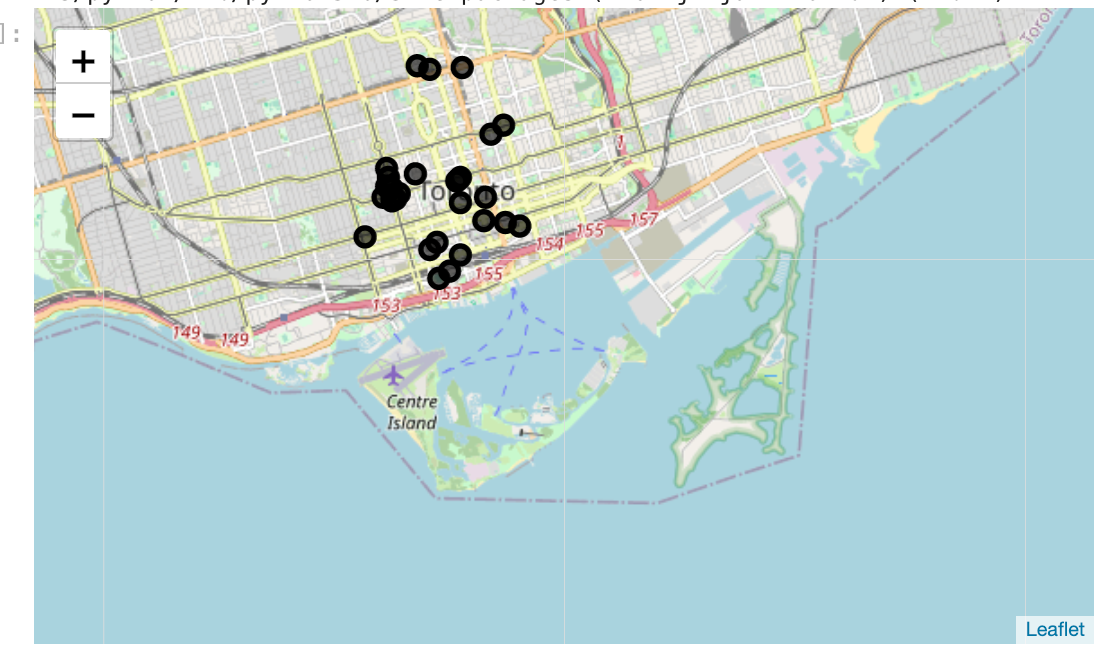

## Methodology

## Now that we've located and created visuals for restaurants in Toronto. We need to visualize the neighborhoods in the Toronto to identify where most restaurants are found.

In [45]:
toronto_df.groupby(['Borough']).count()

PostalCode  Neighborhood  Latitude  Longitude
Borough                                                              
Central Toronto                  6             6         6          6
Downtown Toronto                 7             7         7          7
East Toronto                     3             3         3          3
East York                        4             4         4          4
East York/East Toronto           1             1         1          1
Etobicoke                        3             3         3          3
North York                      19            19        19         19
Scarborough                      9             9         9          9
West Toronto                     4             4         4          4
York                             3             3         3          3

In [46]:
CT_data = toronto_df[toronto_df['Borough'] == 'Central Toronto'].reset_index(drop=True)
CT_data

DT_data = toronto_df[toronto_df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
DT_data

ET_data = toronto_df[toronto_df['Borough'] == 'East Toronto'].reset_index(drop=True)
ET_data


etobicoke_data = toronto_df[toronto_df['Borough'] == 'Etobicoke'].reset_index(drop=True)
etobicoke_data

Y_data = toronto_df[toronto_df['Borough'] == 'York'].reset_index(drop=True)
Y_data

PostalCode Borough                   Neighborhood   Latitude  Longitude
0        M6C    York             Humewood-Cedarvale  43.688322 -79.428080
1        M6N    York  Runnymede, The Junction North  43.668470 -79.483317
2        M9N    York                         Weston  43.700161 -79.516247

In [47]:
address = 'Central Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
CTlatitude = location.latitude
CTlongitude = location.longitude
print('The geograpical coordinate of Central Toronto are {}, {}.'.format(CTlatitude, CTlongitude))

The geograpical coordinate of Central Toronto are 43.65238435, -79.38356765.


In [48]:
address = 'Downtown Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
DTlatitude = location.latitude
DTlongitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(DTlatitude, DTlongitude))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081162653639.


In [49]:
address = 'East Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
ETlatitude = location.latitude
ETlongitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(ETlatitude, ETlongitude))

The geograpical coordinate of Downtown Toronto are 43.626243, -79.396962.


In [50]:
address = 'Etobicoke, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
Elatitude = location.latitude
Elongitude = location.longitude
print('The geograpical coordinate of Etobicoke are {}, {}.'.format(Elatitude, Elongitude))

The geograpical coordinate of Etobicoke are 43.6435559, -79.5656326.


In [51]:
address = 'York, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
Ylatitude = location.latitude
Ylongitude = location.longitude
print('The geograpical coordinate of Etobicoke are {}, {}.'.format(Ylatitude, Ylongitude))

The geograpical coordinate of Etobicoke are 43.6896191, -79.479188.


In [53]:
# create map of Manhattan using latitude and longitude values
map_Neigh = folium.Map(location=[Tlatitude, Tlongitude], zoom_start=11)


folium.features.CircleMarker(
    [Elatitude, Elongitude],
    radius=10,
    color='red',
    popup='Etobicoke',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_Neigh)

# add markers to map
for lat, lng, label in zip(etobicoke_data['Latitude'], etobicoke_data['Longitude'], etobicoke_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#418c3f',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Neigh)  
    
    
folium.features.CircleMarker(
    [Ylatitude, Ylongitude],
    radius=10,
    color='red',
    popup='York',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_Neigh) 

for lat, lng, label in zip(Y_data['Latitude'], Y_data['Longitude'], Y_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3f2199',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Neigh)  
    
folium.features.CircleMarker(
    [ETlatitude, ETlongitude],
    radius=10,
    color='red',
    popup='Scarborough',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_Neigh)     
    
    
for lat, lng, label in zip(ET_data['Latitude'], ET_data['Longitude'], ET_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#ecef32',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Neigh)     
    
map_Neigh

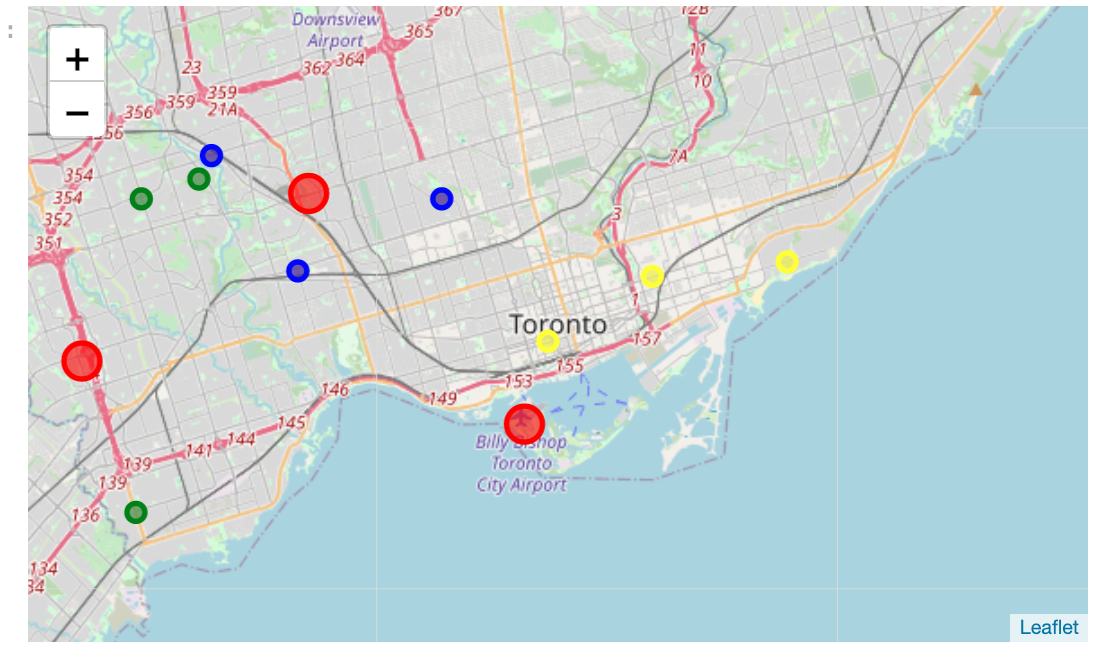

In [54]:
folium.features.CircleMarker(
    [CTlatitude, CTlongitude],
    radius=10,
    color='red',
    popup='Central Toronto',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_Neigh)

# add markers to map
for lat, lng, label in zip(CT_data['Latitude'], CT_data['Longitude'], CT_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#ea2ada',
        fill=True,
        fill_color='#ea2ada',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Neigh)  
    
    
folium.features.CircleMarker(
    [DTlatitude, DTlongitude],
    radius=10,
    color='red',
    popup='Downtown Toronto',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_Neigh) 

for lat, lng, label in zip(DT_data['Latitude'], DT_data['Longitude'], DT_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#0cf9f9',
        fill=True,
        fill_color='#0cf9f9',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Neigh)  
    
    
map_Neigh

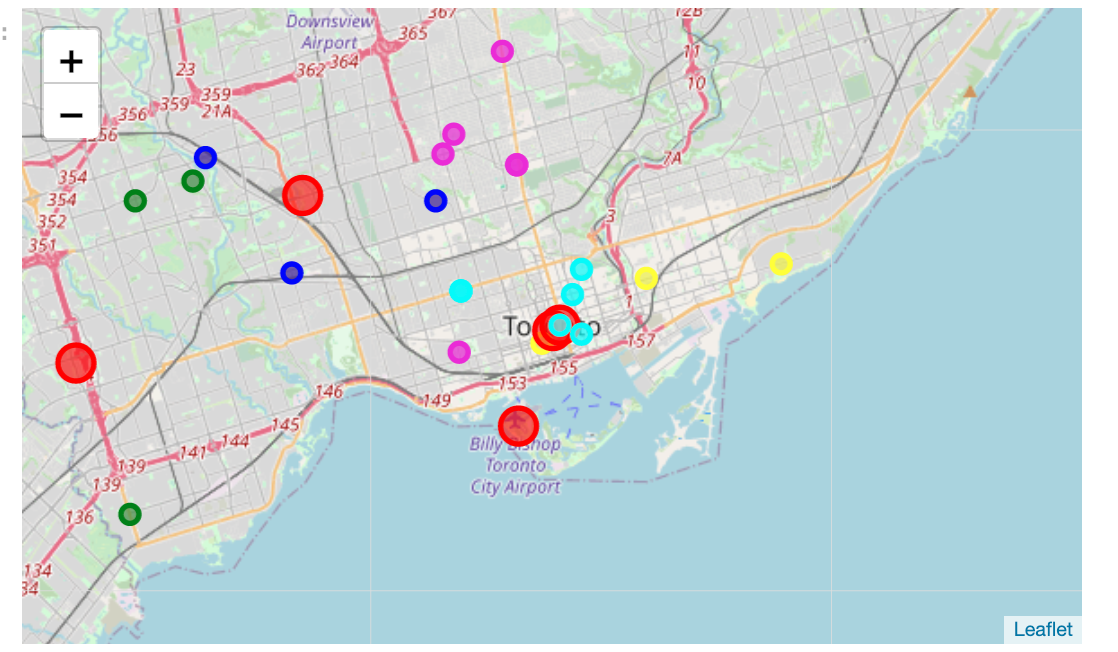

In [56]:
NY_data = toronto_df[toronto_df['Borough'] == 'North York'].reset_index(drop=True)
NY_data

SC_data = toronto_df[toronto_df['Borough'] == 'Scarborough'].reset_index(drop=True)
SC_data

PostalCode      Borough                                     Neighborhood  \
0        M1B  Scarborough                                   Malvern, Rouge   
1        M1E  Scarborough                Guildwood, Morningside, West Hill   
2        M1G  Scarborough                                           Woburn   
3        M1H  Scarborough                                        Cedarbrae   
4        M1J  Scarborough                              Scarborough Village   
5        M1M  Scarborough  Cliffside, Cliffcrest, Scarborough Village West   
6        M1S  Scarborough                                        Agincourt   
7        M1W  Scarborough                    Steeles West, L'Amoreaux West   
8        M1X  Scarborough                                      Upper Rouge   

    Latitude  Longitude  
0  43.809196 -79.221701  
1  43.781087 -79.205440  
2  43.759824 -79.225291  
3  43.756467 -79.226692  
4  43.743742 -79.211632  
5  43.726252 -79.230463  
6  43.785353 -79.278549  
7  43.802994 -79.308447  
8  43.809343 -79.187571

## The maps above show us that Central Toronto and Downtown Toronto hold the largest amount of restaurants. Let's use this information to find other neighborhoods that resemble these areas.

In [57]:
df = etobicoke_data.append(NY_data)
df = df.append(CT_data)
df = df.append(DT_data)
df = df.append(ET_data)
df = df.append(SC_data)

In [58]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [59]:
# type your answer here

neigh_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Islington Avenue
Westmount
Alderwood, Long Branch
Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills North
Glencairn
Don Mills South
Hillcrest Village
Bayview Village
Downsview East
York Mills, Silver Hills
Downsview West
Humber Summit
Willowdale, Newtonbrook
Downsview Central
Bedford Park, Lawrence Manor East
Willowdale South
Downsview Northwest
York Mills West
Willowdale West
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
North Toronto West
Davisville
St. James Town
Central Bay Street
Christie
Richmond, Adelaide, King
University of Toronto, Harbord
Rosedale
Church and Wellesley
The Beaches
The Danforth West, Riverdale
Studio District
Malvern, Rouge
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Cliffside, Cliffcrest, Scarborough Village West
Agincourt
Steeles West, L'Amoreaux West
Upper Rouge


In [60]:
print(neigh_venues.shape)
neigh_venues.head()

(835, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Islington Avenue              43.688307              -79.542802   
1  Islington Avenue              43.688307              -79.542802   
2  Islington Avenue              43.688307              -79.542802   
3  Islington Avenue              43.688307              -79.542802   
4         Westmount              43.693640              -79.521043   

                      Venue  Venue Latitude  Venue Longitude   Venue Category  
0  Westway Medical Pharmacy       43.688907       -79.542554         Pharmacy  
1              Westway Park       43.685528       -79.541434   Baseball Field  
2                       GNC       43.691625       -79.546012  Supplement Shop  
3          Silvercreek Park       43.684095       -79.540633             Park  
4              Petro-Canada       43.696091       -79.520962      Gas Station

In [61]:
neigh_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                             
Agincourt                                                           11   
Alderwood, Long Branch                                               8   
Bayview Village                                                     10   
Bedford Park, Lawrence Manor East                                    2   
Cedarbrae                                                           26   
Central Bay Street                                                  30   
Christie                                                            30   
Church and Wellesley                                                30   
Cliffside, Cliffcrest, Scarborough Village West                      6   
Davisville                                                          30   
Davisville North                                                    30   
Don Mills North                                                     30   
Don Mills South                                                     30   
Downsview Central                                                   10   
Downsview East                                                      10   
Downsview Northwest                                                 10   
Downsview West                                                      10   
Forest Hill North & West                                            23   
Glencairn                                                            4   
Guildwood, Morningside, West Hill                                    9   
Hillcrest Village                                                   14   
Humber Summit                                                        4   
Islington Avenue                                                     4   
Lawrence Manor, Lawrence Heights                                     8   
Lawrence Park                                                       30   
Malvern, Rouge                                                      13   
North Toronto West                                                  30   
Parkwoods                                                           12   
Richmond, Adelaide, King                                            30   
Rosedale                                                            30   
Roselawn                                                             4   
Scarborough Village                                                  7   
St. James Town                                                      27   
Steeles West, L'Amoreaux West                                        9   
Studio District                                                     30   
The Beaches                                                         30   
The Danforth West, Riverdale                                        30   
University of Toronto, Harbord                                      30   
Upper Rouge                                                          2   
Victoria Village                                                     4   
Westmount                                                            3   
Willowdale South                                                    30   
Willowdale West                                                     30   
Willowdale, Newtonbrook                                             20   
Woburn                                                              22   
York Mills West                                                     13   
York Mills, Silver Hills                                            20   

                                                 Neighborhood Longitude  \
Neighborhood                                                              
Agincourt                                                            11   
Alderwood, Long Branch                                                8   
Bayview Village                                                      10   
Bedford Park, Lawrence Manor East              

In [62]:
print('There are {} uniques categories.'.format(len(neigh_venues['Venue Category'].unique())))

There are 165 uniques categories.


In [63]:
# one hot encoding
neigh_onehot = pd.get_dummies(neigh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neigh_onehot['Neighborhood'] = neigh_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [neigh_onehot.columns[-1]] + list(neigh_onehot.columns[:-1])
neigh_onehot = neigh_onehot[fixed_columns]

neigh_onehot.head()

Yoga Studio  ATM  American Restaurant  Arcade  Art Gallery  \
0            0    0                    0       0            0   
1            0    0                    0       0            0   
2            0    0                    0       0            0   
3            0    0                    0       0            0   
4            0    0                    0       0            0   

   Asian Restaurant  Athletics & Sports  Auto Garage  BBQ Joint  Bagel Shop  \
0                 0                   0            0          0           0   
1                 0                   0            0          0           0   
2                 0                   0            0          0           0   
3                 0                   0            0          0           0   
4                 0                   0            0          0           0   

   Bakery  Bank  Bar  Baseball Field  Beach  Beer Store  Big Box Store  \
0       0     0    0               0      0           0              0   
1       0     0    0               1      0           0              0   
2       0     0    0               0      0           0              0   
3       0     0    0               0      0           0              0   
4       0     0    0               0      0           0              0   

   Bike Rental / Bike Share  Bistro  Bookstore  Botanical Garden  Boutique  \
0                         0       0          0                 0         0   
1                         0       0          0                 0         0   
2                         0       0          0                 0         0   
3                         0       0          0                 0         0   
4                         0       0          0                 0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0                     0               0        0                0   
1                     0               0        0                0   
2                     0               0        0                0   
3                     0               0        0                0   
4                     0               0        0                0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  \
0             0              0         0            0         0   
1             0              0         0            0         0   
2             0              0         0            0         0   
3             0              0         0            0         0   
4             0              0         0            0         0   

   Business Service  Café  Cantonese Restaurant  Caribbean Restaurant  \
0                 0     0                     0                     0   
1                 0     0                     0                     0   
2                 0     0                     0                     0   
3                 0     0                     0                     0   
4                 0     0                     0                     0   

   Cheese Shop  Chinese Restaurant  Chocolate Shop  Climbing Gym  \
0            0                   0               0             0   
1            0                   0               0             0   
2            0                   0               0             0   
3            0                   0               0             0   
4            0                   0               0             0   

   Clothing Store  Cocktail Bar  Coffee Shop  Comic Shop  Concert Hall  \
0               0             0            0           0             0   
1               0             0            0           0             0   
2               0             0            0           0             0   
3               0             0            0           0             0   
4               0             0            0           0             0   

   Construction & Landscaping  Convenience Store  Cosmetics Shop  Creperie  \
0                           0     

In [64]:
(neigh_onehot.shape)

(835, 165)

In [65]:
neigh_grouped = neigh_onehot.groupby('Neighborhood').mean().reset_index()
neigh_grouped

Neighborhood  Yoga Studio       ATM  \
0                                         Agincourt     0.000000  0.000000   
1                            Alderwood, Long Branch     0.000000  0.000000   
2                                   Bayview Village     0.000000  0.000000   
3                 Bedford Park, Lawrence Manor East     0.000000  0.000000   
4                                         Cedarbrae     0.000000  0.000000   
5                                Central Bay Street     0.000000  0.000000   
6                                          Christie     0.000000  0.000000   
7                              Church and Wellesley     0.000000  0.000000   
8   Cliffside, Cliffcrest, Scarborough Village West     0.000000  0.000000   
9                                        Davisville     0.000000  0.000000   
10                                 Davisville North     0.000000  0.000000   
11                                  Don Mills North     0.000000  0.000000   
12                                  Don Mills South     0.000000  0.000000   
13                                Downsview Central     0.000000  0.000000   
14                                   Downsview East     0.000000  0.000000   
15                              Downsview Northwest     0.000000  0.000000   
16                                   Downsview West     0.000000  0.000000   
17                         Forest Hill North & West     0.000000  0.000000   
18                                        Glencairn     0.000000  0.000000   
19                Guildwood, Morningside, West Hill     0.000000  0.000000   
20                                Hillcrest Village     0.000000  0.000000   
21                                    Humber Summit     0.000000  0.000000   
22                                 Islington Avenue     0.000000  0.000000   
23                 Lawrence Manor, Lawrence Heights     0.000000  0.000000   
24                                    Lawrence Park     0.000000  0.000000   
25                                   Malvern, Rouge     0.000000  0.000000   
26                               North Toronto West     0.033333  0.000000   
27                                        Parkwoods     0.000000  0.083333   
28                         Richmond, Adelaide, King     0.000000  0.000000   
29                                         Rosedale     0.000000  0.000000   
30                                         Roselawn     0.000000  0.000000   
31                              Scarborough Village     0.000000  0.000000   
32                                   St. James Town     0.000000  0.000000   
33                    Steeles West, L'Amoreaux West     0.000000  0.000000   
34                                  Studio District     0.033333  0.000000   
35                                      The Beaches     0.000000  0.000000   
36                     The Danforth West, Riverdale     0.000000  0.000000   
37                   University of Toronto, Harbord     0.000000  0.000000   
38                                      Upper Rouge     0.000000  0.000000   
39                                 Victoria Village     0.000000  0.000000   
40                                        Westmount     0.000000  0.000000   
41                                 Willowdale South     0.033333  0.000000   
42                                  Willowdale West     0.033333  0.000000   
43                          Willowdale, Newtonbrook     0.000000  0.000000   
44                                           Woburn     0.000000  0.000000   
45                                  York Mills West     0.000000  0.000000   
46                         York Mills, Silver Hills     0.000000  0.000000   

    American Restaurant  Arcade  Art Gallery  Asian Restaurant  \
0              0.000000    0.00     0.000000          0.090909   
1              0.000000    0.00     0.000000          0.000000   
2              0.000000    0.00     0.000000          0.000000   
3              0.000000    0.0

In [66]:
neigh_grouped.shape

(47, 165)

In [67]:
num_top_venues = 5

for hood in neigh_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = neigh_grouped[neigh_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.18
1  Cantonese Restaurant  0.18
2           Coffee Shop  0.09
3            Food Court  0.09
4     Korean Restaurant  0.09


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1      Playground  0.12
2        Pharmacy  0.12
3             Pub  0.12
4  Sandwich Place  0.12


----Bayview Village----
                  venue  freq
0                  Bank   0.2
1  Outdoor Supply Store   0.1
2  Fast Food Restaurant   0.1
3           Gas Station   0.1
4        Sandwich Place   0.1


----Bedford Park, Lawrence Manor East----
                 venue  freq
0  Rental Car Location   0.5
1   Seafood Restaurant   0.5
2          Yoga Studio   0.0
3               Office   0.0
4    Mobile Phone Shop   0.0


----Cedarbrae----
                    venue  freq
0    Fast Food Restaurant  0.12
1             Coffee Shop  0.08
2        Department Store  0.04
3  Furniture / Home Store  0.04
4             Pizza P

In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neigh_grouped['Neighborhood']

for ind in np.arange(neigh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neigh_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                          Agincourt    Chinese Restaurant   
1             Alderwood, Long Branch           Pizza Place   
2                    Bayview Village                  Bank   
3  Bedford Park, Lawrence Manor East    Seafood Restaurant   
4                          Cedarbrae  Fast Food Restaurant   

  2nd Most Common Venue 3rd Most Common Venue          4th Most Common Venue  \
0  Cantonese Restaurant           Coffee Shop          Vietnamese Restaurant   
1           Coffee Shop        Sandwich Place                            Pub   
2           Pizza Place           Gas Station           Outdoor Supply Store   
3   Rental Car Location           Wings Joint                  Deli / Bodega   
4           Coffee Shop              Pharmacy  Paper / Office Supplies Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0  Hong Kong Restaurant         Train Station      Asian Restaurant   
1          Skating Rink            Playground              Pharmacy   
2        Sandwich Place        Breakfast Spot  Fast Food Restaurant   
3           Event Space  Ethiopian Restaurant     Electronics Store   
4         Shopping Mall        Sandwich Place           Bus Station   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0            Food Court     Korean Restaurant       Department Store  
1          Dance Studio        Discount Store                  Diner  
2           Fish Market    Persian Restaurant              Gastropub  
3        Discount Store                 Diner           Dessert Shop  
4           Pizza Place                   Gym                   Park

In [70]:
# set number of clusters
kclusters = 21

neigh_grouped_clustering = neigh_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neigh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([17,  8,  4,  7,  0,  6, 10,  6, 19,  1], dtype=int32)

In [74]:
# add clustering labels
labels = kmeans.labels_.astype(int)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', labels)

neigh_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neigh_merged = neigh_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

neigh_merged.head() # check the last columns!


PostalCode     Borough            Neighborhood   Latitude  Longitude  \
0        M9A   Etobicoke        Islington Avenue  43.688307 -79.542802   
1        M9P   Etobicoke               Westmount  43.693640 -79.521043   
2        M8W   Etobicoke  Alderwood, Long Branch  43.601717 -79.545232   
0        M3A  North York               Parkwoods  43.758800 -79.320197   
1        M4A  North York        Victoria Village  43.732658 -79.311189   

   Cluster Labels  Cluster Labels3     1st Most Common Venue  \
0              12               12                  Pharmacy   
1               9                9               Pizza Place   
2               8                8               Pizza Place   
0               6                6               Pizza Place   
1              11               11  Mediterranean Restaurant   

  2nd Most Common Venue      3rd Most Common Venue 4th Most Common Venue  \
0                  Park            Supplement Shop        Baseball Field   
1           Gas Station                       Park           Event Space   
2           Coffee Shop             Sandwich Place                   Pub   
0           Gas Station                Coffee Shop        Discount Store   
1       Thai Restaurant  Middle Eastern Restaurant              Bus Line   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0      Department Store           Event Space  Ethiopian Restaurant   
1  Ethiopian Restaurant     Electronics Store        Discount Store   
2          Skating Rink            Playground              Pharmacy   
0          Liquor Store       Laundry Service                  Bank   
1           Event Space  Ethiopian Restaurant     Electronics Store   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0     Electronics Store        Discount Store                  Diner  
1                 Diner          Dessert Shop       Department Store  
2          Dance Studio        Discount Store                  Diner  
0  Caribbean Restaurant         Shopping Mall                    ATM  
1        Discount Store                 Diner           Dessert Shop

In [75]:
neigh_merged = neigh_merged[~neigh_merged['Cluster Labels3'].isnull()]


# final conversion now worked
neigh_merged[['Cluster Labels3']] = neigh_merged[['Cluster Labels3']].astype(int)

In [77]:
# create map
map_clusters = folium.Map(location=[Tlatitude, Tlongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neigh_merged['Latitude'], neigh_merged['Longitude'], neigh_merged['Neighborhood'], neigh_merged['Cluster Labels3']):
    if np.isnan(cluster):
        cluster = np.nan_to_num(cluster)
    
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
    

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='#000000',
        popup=label,
        fill = True,
        fill_color='#000000',
        fill_opacity=0.6
    ).add_to(map_clusters)

    
       
map_clusters

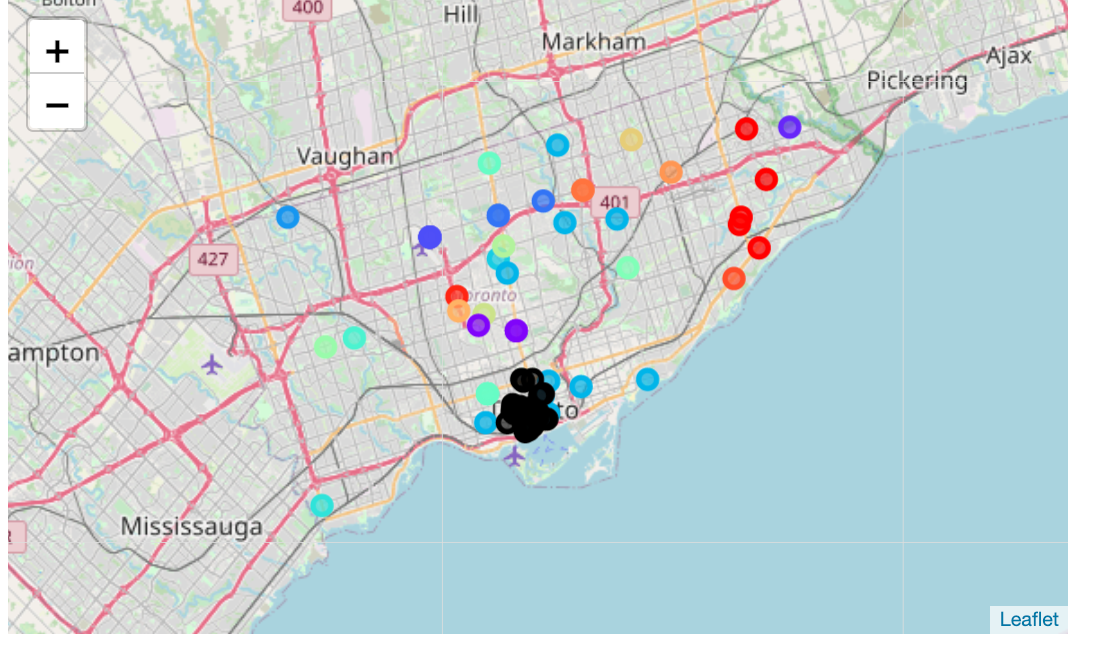

In [78]:
neigh_merged.loc[neigh_merged['Cluster Labels'] == 0, neigh_merged.columns[[1] + list(range(5, neigh_merged.shape[1]))]]

Borough  Cluster Labels  Cluster Labels3 1st Most Common Venue  \
0  Scarborough               0                0  Fast Food Restaurant   
1  Scarborough               0                0              Pharmacy   
2  Scarborough               0                0  Fast Food Restaurant   
3  Scarborough               0                0  Fast Food Restaurant   
4  Scarborough               0                0           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue          4th Most Common Venue  \
0              Pharmacy           Pizza Place                    Supermarket   
1           Coffee Shop  Fast Food Restaurant              Convenience Store   
2           Coffee Shop              Pharmacy                           Bank   
3           Coffee Shop              Pharmacy  Paper / Office Supplies Store   
4                   Gym              Pharmacy             Chinese Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Grocery Store                  Park            Restaurant   
1        Discount Store                  Café           Supermarket   
2     Indian Restaurant     Electronics Store        Discount Store   
3         Shopping Mall        Sandwich Place           Bus Station   
4  Fast Food Restaurant                   Pub           Supermarket   

  8th Most Common Venue 9th Most Common Venue         10th Most Common Venue  
0        Sandwich Place       Bubble Tea Shop           Gym / Fitness Center  
1        Sandwich Place           Wings Joint               Department Store  
2      Department Store          Optical Shop  Paper / Office Supplies Store  
3           Pizza Place                   Gym                           Park  
4           Wings Joint         Deli / Bodega                 Discount Store

# Results

### After visualizing all of our data, we see that the most restaurants are based in the Central or Downtown Toronto. The black circles, which represent restaurant locations, are mainly plotted in these two areas. Based off the results, we can suggest that anyone who would like to start their journey of becoming a restaurant owner should consider looking for locations in Downtown or Central Toronto. More specifically, there were three neighborhoods that showed the most potential; Adelaide, Spadina and South Hill. The results shown that these areas will provide a greater chance of success based on the ratings of other restaurants and the location in itself.

# Conclusion

### Opening up a restaurant in Toronto will be a large heap for anyone up to the task. There are so many places for tourists to choose from and the competition will be present but hopefully this report provided insight on how stakeholders and future restaurateurs can be prepared to have success.